<a href="https://colab.research.google.com/github/vivekdubey74vv/Stocks-Prices-Prediction--using-LSTM/blob/main/Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [3]:
 data = pd.read_csv('/content/Google_train_data.csv')
data.head()



,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.tail()


,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
 data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [8]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [10]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [11]:
X_train = []
y_train = []
for i in range (60,1149):
 X_train.append(trainData[i-60:i,0])
 y_train.append(trainData[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [12]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

#Model Build

In [14]:
model = Sequential()
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [15]:
 hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)


Epoch 1/20
35/35 - 25s - loss: 0.0358 - 25s/epoch - 724ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0140 - 7s/epoch - 212ms/step
Epoch 3/20
35/35 - 8s - loss: 0.0110 - 8s/epoch - 241ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0079 - 8s/epoch - 230ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0079 - 8s/epoch - 217ms/step
Epoch 6/20
35/35 - 9s - loss: 0.0079 - 9s/epoch - 264ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0072 - 7s/epoch - 214ms/step
Epoch 8/20
35/35 - 8s - loss: 0.0069 - 8s/epoch - 236ms/step
Epoch 9/20
35/35 - 9s - loss: 0.0062 - 9s/epoch - 255ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0070 - 7s/epoch - 208ms/step
Epoch 11/20
35/35 - 8s - loss: 0.0058 - 8s/epoch - 240ms/step
Epoch 12/20
35/35 - 8s - loss: 0.0055 - 8s/epoch - 241ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0056 - 7s/epoch - 206ms/step
Epoch 14/20
35/35 - 9s - loss: 0.0055 - 9s/epoch - 243ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0058 - 7s/epoch - 213ms/step
Epoch 16/20
35/35 - 8s - loss: 0.0067 - 8s/epoch - 232ms/step
Epoch 17/20
35/

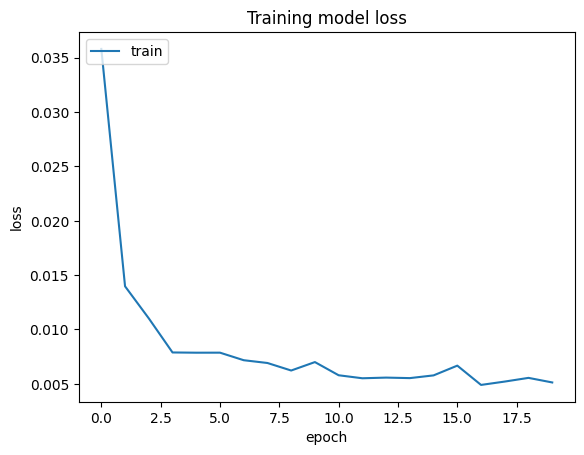

In [16]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
testData = pd.read_csv('/content/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
  X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [18]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 67ms/step


array([[1.4398313],
       [1.4420907],
       [1.4537671],
       [1.472722 ],
       [1.4907311],
       [1.4970078],
       [1.4896218],
       [1.4743118],
       [1.4616677],
       [1.4554045],
       [1.4461821],
       [1.432777 ],
       [1.4197979],
       [1.4072788],
       [1.4015146],
       [1.4029502],
       [1.4188074],
       [1.4475405],
       [1.4838564],
       [1.5231147],
       [1.5468327],
       [1.5540081],
       [1.5414062],
       [1.5150354],
       [1.4858898],
       [1.4638126],
       [1.4517552],
       [1.4443219],
       [1.4327849],
       [1.4185421],
       [1.4032687],
       [1.3864176],
       [1.3631628],
       [1.3345084],
       [1.3183084],
       [1.3214796],
       [1.3399854],
       [1.3660414],
       [1.3946587],
       [1.4147793],
       [1.4346123],
       [1.4561583],
       [1.4795593],
       [1.5017794],
       [1.5188133],
       [1.5259157],
       [1.5203964],
       [1.5123496],
       [1.5079061],
       [1.5104356],


In [19]:
 predicted_price = sc.inverse_transform(y_pred)


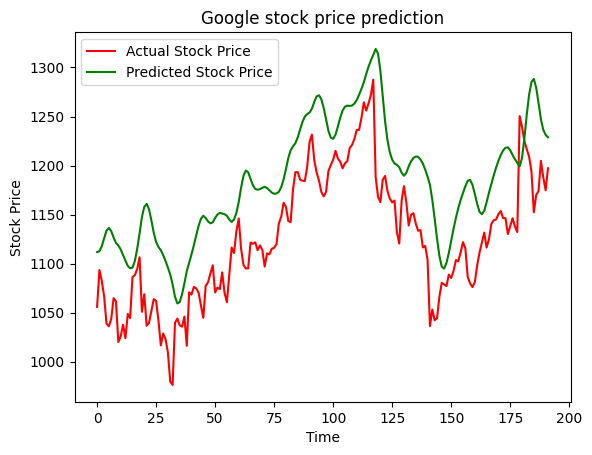

In [20]:
 plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
